In [17]:
import numpy as np
import tensorflow as tf
import keras 
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

In [18]:
IMG_SIZE = (64, 64)
NUM_CLASSES = 29
train_dir = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/"
test_dir = "/kaggle/input/asl-alphabet/asl_alphabet_test/asl_alphabet_test/"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    label_mode='int',
    shuffle=True,
    batch_size=None
)

train_images = []
train_labels = []

for img, label in train_ds:
    train_images.append(img)
    train_labels.append(label)

train_images = tf.stack(train_images).numpy() / 255.0
train_labels = tf.stack(train_labels).numpy()

class_names = sorted(os.listdir(train_dir))
test_images = []
test_labels = []

for file in sorted(os.listdir(test_dir)):
    if file.endswith(".jpg"):
        label_char = file[0].upper()
        if label_char in class_names:
            label = class_names.index(label_char)
            img_path = os.path.join(test_dir, file)
            img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
            img = tf.keras.utils.img_to_array(img) / 255.0
            test_images.append(img)
            test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

print(f"Shape of input data -> {train_images.shape}")

Found 87000 files belonging to 29 classes.
Shape of input data -> (87000, 64, 64, 3)


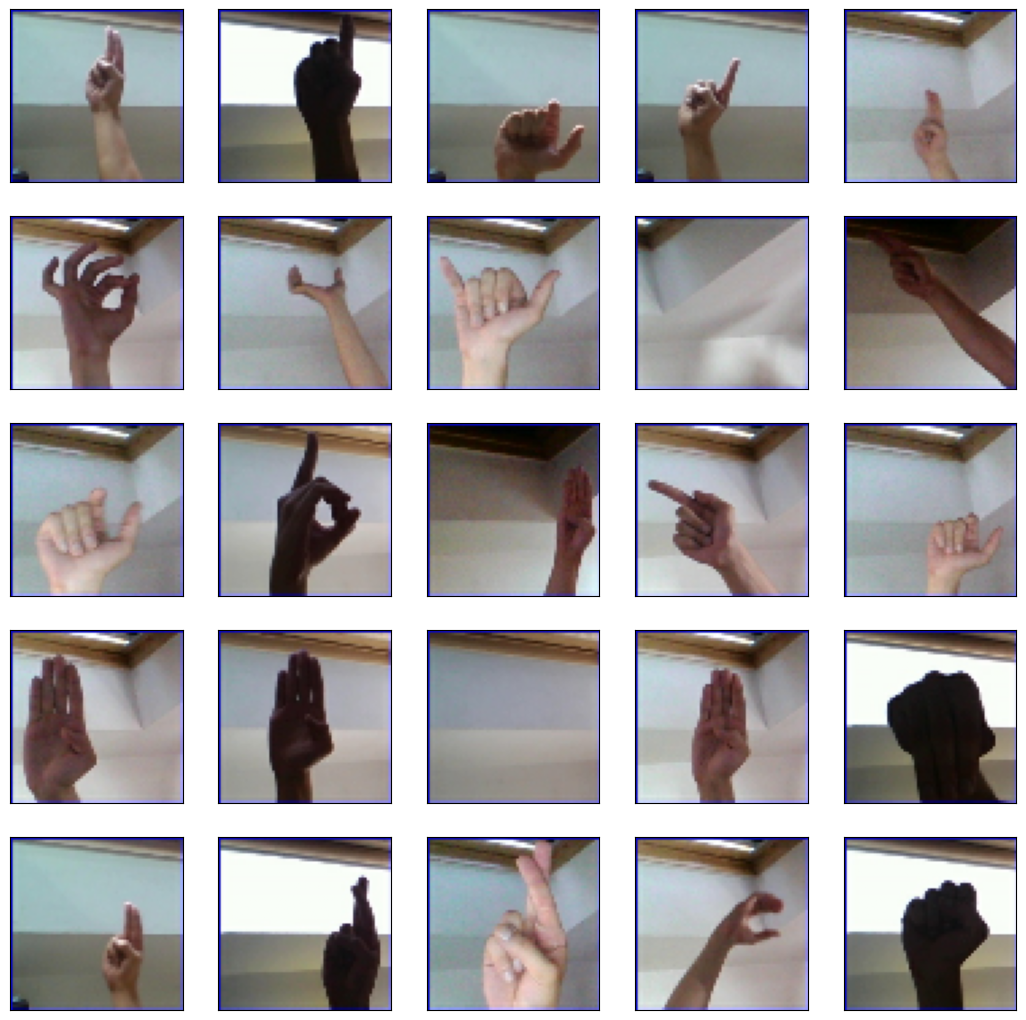

In [19]:
fig = plt.figure(figsize=(13,13))
fig.tight_layout(pad=0.8, h_pad=2)
for idx in range(25):
    ax = fig.add_subplot(5, 5, idx+1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.grid(False)
    ax.imshow(train_images[idx], cmap=plt.cm.binary)
plt.show()

In [21]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3))) 
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [22]:
print(train_labels.shape)
train_images = train_images.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3)
test_images = test_images.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3)
train_labels = to_categorical(train_labels, NUM_CLASSES)
test_labels = to_categorical(test_labels, NUM_CLASSES)
print(train_labels.shape)

(87000,)
(87000, 29)


In [23]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=[test_images, test_labels])

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.5259 - loss: 1.5981 - val_accuracy: 0.9286 - val_loss: 2.0541
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9617 - loss: 0.1149 - val_accuracy: 0.8929 - val_loss: 2.4293
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9797 - loss: 0.0624 - val_accuracy: 0.8571 - val_loss: 3.1251
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9858 - loss: 0.0426 - val_accuracy: 0.9286 - val_loss: 3.1198
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9889 - loss: 0.0344 - val_accuracy: 0.9286 - val_loss: 3.0881
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9286 - val_loss: 3.0837
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9924 - loss: 0.0247 - val_accuracy: 0.9286 - val_loss: 3.0039
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9933 - loss: 0

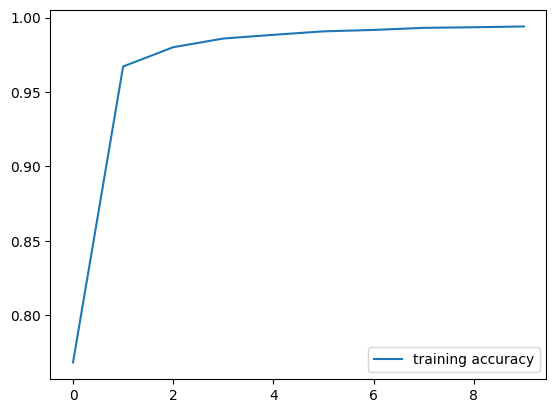

In [25]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.legend()
plt.show()

In [26]:
accuracy_loss = model.evaluate(test_images, test_labels, verbose=2)
print('Test Loss', accuracy_loss[0])
print('Test Accuracy', accuracy_loss[1])

1/1 - 0s - 46ms/step - accuracy: 0.9286 - loss: 3.7711
Test Loss 3.771085262298584
Test Accuracy 0.9285714030265808


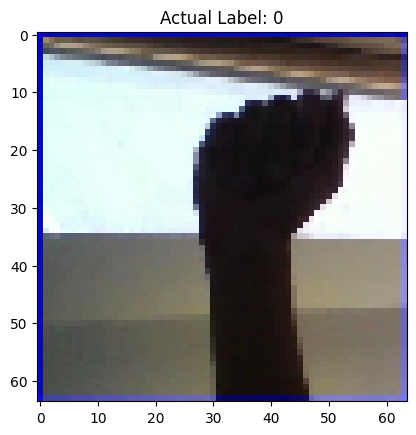

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
Predicted Class: 0
Confidence Scores: [[9.9999952e-01 1.5576065e-20 3.0417454e-20 3.3984123e-22 1.7350953e-09
  3.9660586e-15 1.0880297e-24 1.6012006e-27 8.5002222e-19 2.1188315e-24
  3.5483880e-13 9.8857215e-15 5.4055362e-14 8.9294147e-20 1.1379322e-19
  4.6085049e-31 9.2237037e-26 3.3316808e-27 4.9904480e-07 1.6418161e-12
  2.5874673e-22 1.1133167e-18 7.5122769e-14 1.0367091e-13 1.3271000e-16
  6.1265330e-23 2.3044539e-27 3.2336619e-20 2.1341006e-29]]


In [27]:
single_image = test_images[0]
plt.imshow(single_image.squeeze(), cmap=plt.cm.binary)
plt.title("Actual Label: {}".format(np.argmax(test_labels[0])))
plt.show()

single_image = np.expand_dims(single_image, axis=0)
prediction = model.predict(single_image)
predicted_class = np.argmax(prediction)

print("Predicted Class:", predicted_class)
print("Confidence Scores:", prediction)